<a href="https://colab.research.google.com/github/mateuszStanislawski/red-wine-analysis/blob/main/WineAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Materiały:
https://www.sciencedirect.com/science/article/pii/S0167923609001377?casa_token=58A7ShIS4XoAAAAA:1pl5U1fVvOfMemq6M8_phJrqAQU31lKAAQX7aqU3fVCjpqdb1y3KuLQRA3TGdn7hNrFiEVqCzkY

**Autorzy projektu:** Mateusz Stanisławski, Michel Voss, Klaudia Wolniewicz

Tytuł: Badanie wpływu rożnych zmiennych na jakość czerwonego wina. Próba klasyfikacji wina.

**Opis problemu**

Wino od dawien dawna jest popularnym trunkiem na świecie. W związku z różnorodnością odmian winorośli, oddziaływania środowiska na ich wzrost oraz technik winifikacji, istnieje niezmierzona liczba odmian win. Wyróżniamy wina białe, różowe oraz czerwone, a ze względu na zawartość cukru dzielimy je na wytrawne, półwytrawne, półsłodkie i słodkie. 

Rynek oferuje nieograniczoną liczbę różnych win, co jest dużym atutem współczesnych czasów, ale potrafi stać się również utrapieniem. Konsument staje przed dylematem, na co zwrócić uwagę przy zakupie wina, by wybrać dobrej jakości wino. 

Problem jest o tyle ważny, że duża część konsumentów wina potrafi wyczuć dobre wino, jednak nie ma odpowiedniej wiedzy, którą mógłby się kierować mając przed sobą zamkniętą butelkę wina, gdzie jedynym co może pomóc mu w wyborze jest etykieta.

**Opis przebiegu badania oraz przedstawienie metod rozwiązania problemu**

Stanęliśmy przed próbą rozwiązania tego problemu. W naszym badaniu skupiliśmy się na czerwonym winie. Skorzystaliśmy ze zbioru danych dotyczącego czerwonego wina ze strony kaggle: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009. Naszym celem było sprawdzenie, które zmienne mają największy wpływ na jakość wina, jakie zachodzą zależności między zmienną objaśnianą - jakością wina, a zmiennymi objaśniającymi- zawartością nielotnch kwasów, lotnych kwasów, kwasu cytrynowego, cukru resztkowego, chlorków, wolnego dwutlenku siarki, całkowitego dwutlenku siarki, siarczanów, alkoholu,  a także pH wina, czy jego gęstości. 

Zaczęliśmy od wstępnej analizy danych za pomocą metod statystycznych. W cel sprawdzenia, czy grupy obserwacji wyróznione na podstawie jakości różnią się od siebie znaczocą - posłużyła na do tego ANOVA. Następnie podjeliśmy próbę klasyfikacji wina ze względu na jakość za pomocą modelu regresji liniowej, regresji logistycznej, modelu drzew losowych.

Poniżej krok po kroku opisaliśmy nasze działania wraz z wysuniętymi wnioskami.


Pobranie potrzebnych bibliotek:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Zaimportowanie danych jako dataframe i wstępna analiza:

In [ ]:
data_red_wine = pd.read_csv('data/winequality-red.csv')

data_red_wine.shape

(1599, 12)

W pierwszym kroku wykonaliśmy wstępną analizę danych za pomocą metod statystycznych. Pozwoliło nam to na sprawdzenie, jakie dane znajdują sie w zbiorze, sprawdzić podstawowe miary statystyczne dla każdej z nich, sprawdzić czy zbiór nie posiada braków danych, a także sprawdzić rozkłady wszystkich zmiennych.

In [ ]:
data_red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Po wstępnej analizie wiemy, że zbiór danych dotyczących czerwonego wina składa się z 1599 obserwacji (wiersze). Każda z obserwacji jest opisana przez 12 zmiennych (kolumny):


* fixed acidity (nielotne kwasy): (g(tartaric acid)/dm^3)
* volatile acidity (lotne kwasy): (g(acetic acid)/dm^3)
* citric acid (kwas cytrynowy): (g/dm^3)
* residual sugar (cukier resztkowy): (g/dm^3)
* chlorides (chlorki):  (g(sodium chloride)/dm3)
* free sulfur dioxide (wolny dwutlenek siarki): (mg/dm3)
* total sulfur dioxide (całkowity dwutlenek siarki):  (mg/dm3)
* density (gęstość): (g/cm3)
* pH (pH)
* sulphates (siarczany):  (g(potassium sulphate)/dm3)
* alcohol (alkohol): (vol.%)
* quality (jakość): 0 - 10


In [ ]:
data_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Sprawdziliśmy podstawowe miary statystyczne opisujące każdą zmienną w zbiorze:

In [ ]:
data_red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


A także sprawdziliśmy, czy zbiór danych nie posiada braków danych, które mogłyby mieć negatywny wpływ na otrzymane wyniki po dalszej analizie:

In [ ]:
data_red_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Zbiór danych dotyczących czerwonego wina nie posiada braków danych.

Sprawdźmy, jak wygląda rozkład dla zmiennej "quality":

In [ ]:
red_wine_quality = data_red_wine['quality']
red_wine_quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

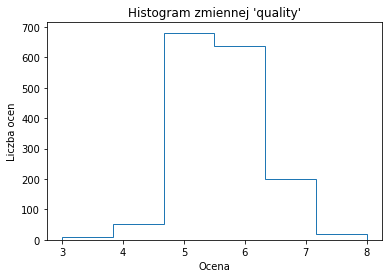

In [ ]:
plt.hist(red_wine_quality, bins=6, histtype='step')
plt.title("Histogram zmiennej 'quality'")
plt.xlabel('Ocena')
plt.ylabel('Liczba ocen')
plt.show()

Przyjmijmy (czysto zdrowo rozsądkowo), że:

**[1,4]** to oceny przyznawane słabym winom,

**(4,7]** to oceny przyznawane średniej jakości winom,

**(7,10]** jest przyznawane dobrej jakości winom.

Na podtsawie histogramu możemy wnioskować, że najwięcej win w zbiorze posiada ocenę 5-6. Biorąc pod uwagę nasze wcześniejsze założenia, oznacza to, że przewagę w zbiorze mają wina oceniane jako średniej jakości wina.

Sprawdźmy teraz, jak różnią się średnio wartości zmiennych między winami pochodzącymi z określonych powyżej grup ( słabe, średnie, dobre):

In [ ]:
lq_wines_series = data_red_wine['quality'] <= 4

lq_wines = data_red_wine[lq_wines_series]
lq_wines_description = lq_wines.describe()
print(lq_wines_description.transpose()['mean'])

fixed acidity            7.871429
volatile acidity         0.724206
citric acid              0.173651
residual sugar           2.684921
chlorides                0.095730
free sulfur dioxide     12.063492
total sulfur dioxide    34.444444
density                  0.996689
pH                       3.384127
sulphates                0.592222
alcohol                 10.215873
quality                  3.841270
Name: mean, dtype: float64


In [ ]:
mq_series_1 = data_red_wine['quality'] > 4
mq_series_2 = data_red_wine['quality'] <= 7


mq_wines = data_red_wine[mq_series_1 & mq_series_2]
mq_wines_description = mq_wines.describe()
print(mq_wines_description.transpose()['mean'])

fixed acidity            8.335310
volatile acidity         0.520909
citric acid              0.273590
residual sugar           2.532279
chlorides                0.087349
free sulfur dioxide     16.063900
total sulfur dioxide    47.121212
density                  0.996767
pH                       3.308603
sulphates                0.659585
alcohol                 10.411759
quality                  5.682477
Name: mean, dtype: float64


In [ ]:
hq_wines_series = data_red_wine['quality'] > 7

hq_wines = data_red_wine[hq_wines_series]
hq_wines_describtion = hq_wines.describe()
print(hq_wines_describtion.transpose()['mean'])

fixed acidity            8.566667
volatile acidity         0.423333
citric acid              0.391111
residual sugar           2.577778
chlorides                0.068444
free sulfur dioxide     13.277778
total sulfur dioxide    33.444444
density                  0.995212
pH                       3.267222
sulphates                0.767778
alcohol                 12.094444
quality                  8.000000
Name: mean, dtype: float64


**WNIOSKI WSTĘPNEJ ANALIZY MIĘDZYGRUPOWEJ**

Patrząc na różnicę w średnich dla różnych zmiennych możemy zauważyć pewne zależności:

1. Wzrost zawartości nielotnych kwasów wzrasta wraz z jakością wina.
2. Spadek zawartości lotnych kwasów wraz z wzrostem jakości wina.
3. Wzrost zawartości kwasu cytrynowego wraz ze wzrostem jakości wina.
4. Spadek zawartości chlorków wraz ze wzrostem jakości wina.
5. Spadek pH wraz ze wzrostem jakości wina.
6. Wzrost zawartości siarczanów wraz ze wzrostem jakości wina.

In [ ]:

def return_barplot(x, y):
  fig = plt.figure(figsize=(10,6))
  g = sns.barplot(x = x, y = y, data = data_red_wine, palette='Blues')
  return g


In [ ]:
column_names = list(data_red_wine.columns)
column_names.remove('quality')

Poniżej przedstawione zostały wykresy słupkowe dla odpowiednich zmiennych w zależności od 'quality'

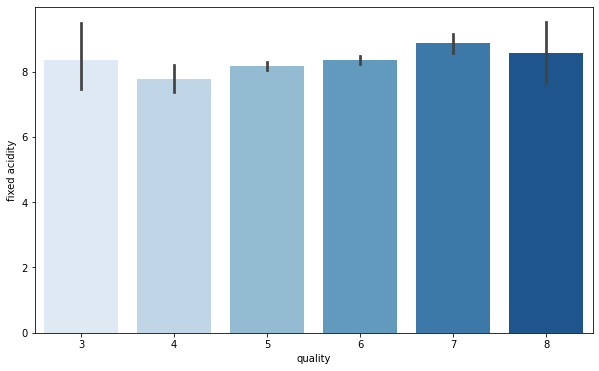

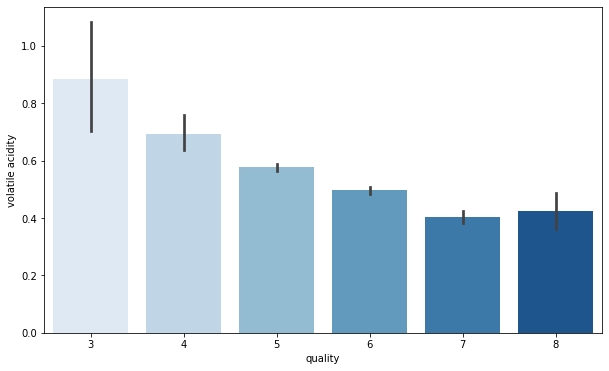

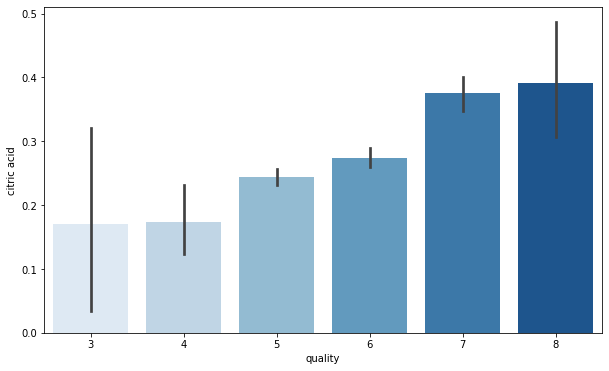

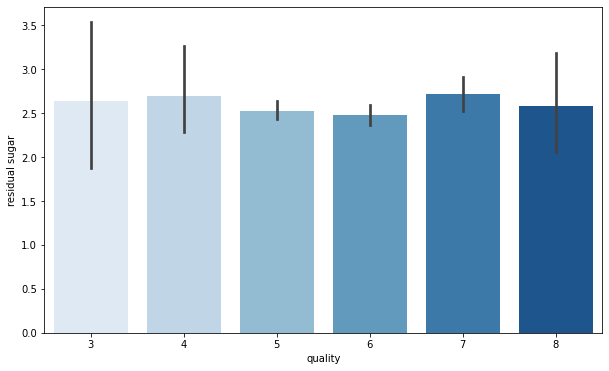

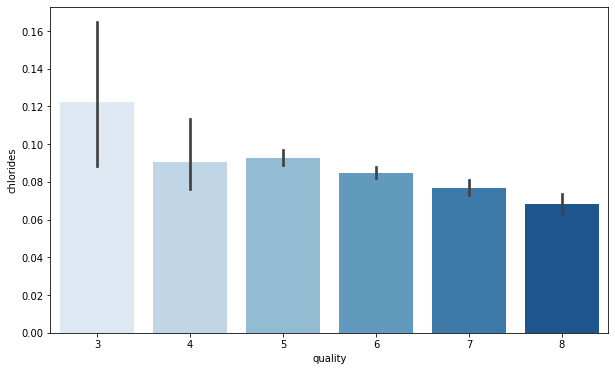

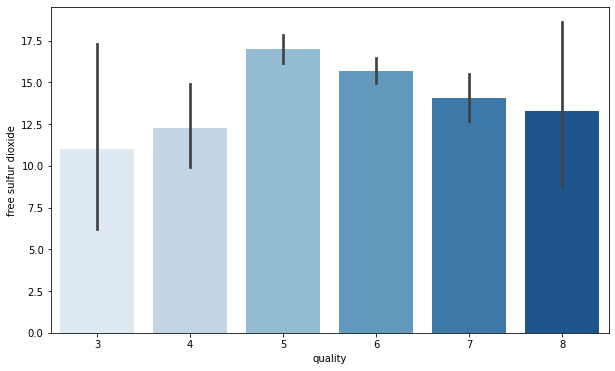

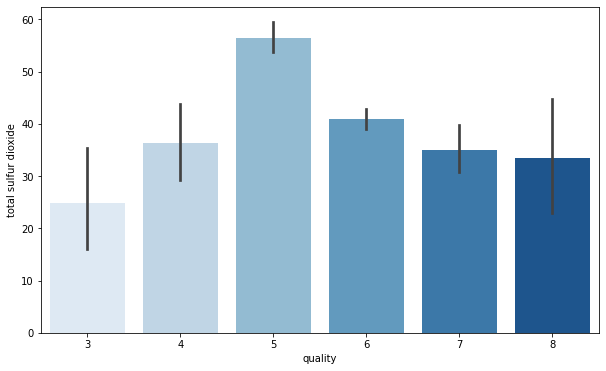

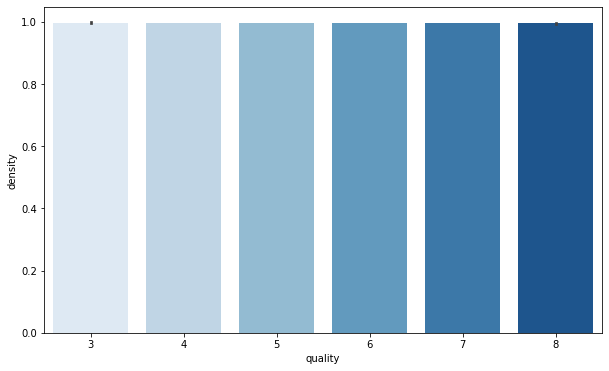

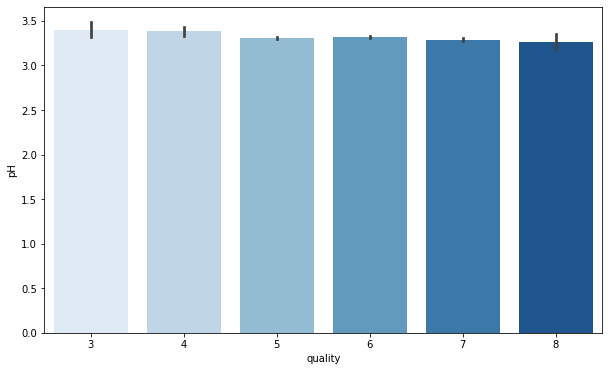

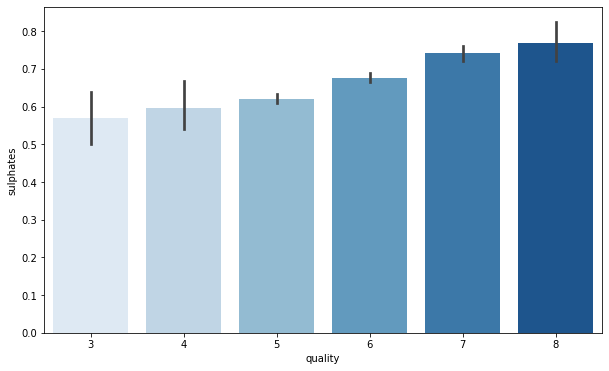

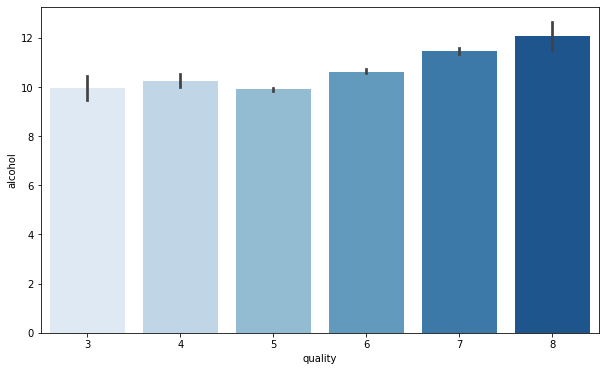

In [ ]:
for column in column_names:
  return_barplot(x = 'quality', y = column)

#Rozkłady zmiennych.  
Można zauważyć, że np zmienne takie jak : 'sulfur dioxide', czy 'sulphates' mają rozkład prawostronny, natomiast zmienne takie jak 'density, czy 'pH' mają rozkłady zbliżone do normalnego


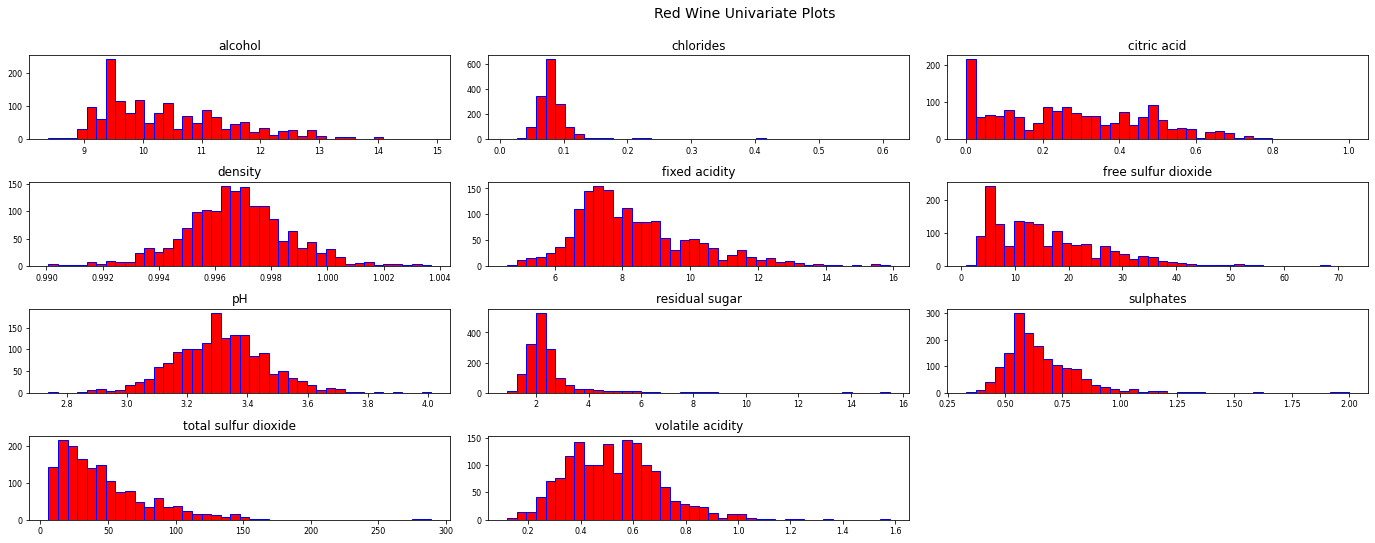

In [ ]:
data_red_wine[column_names].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14);  

Poniższy wykres punktowy przedstawia rozkład relacji wszystkich zmiennych w zbiorze

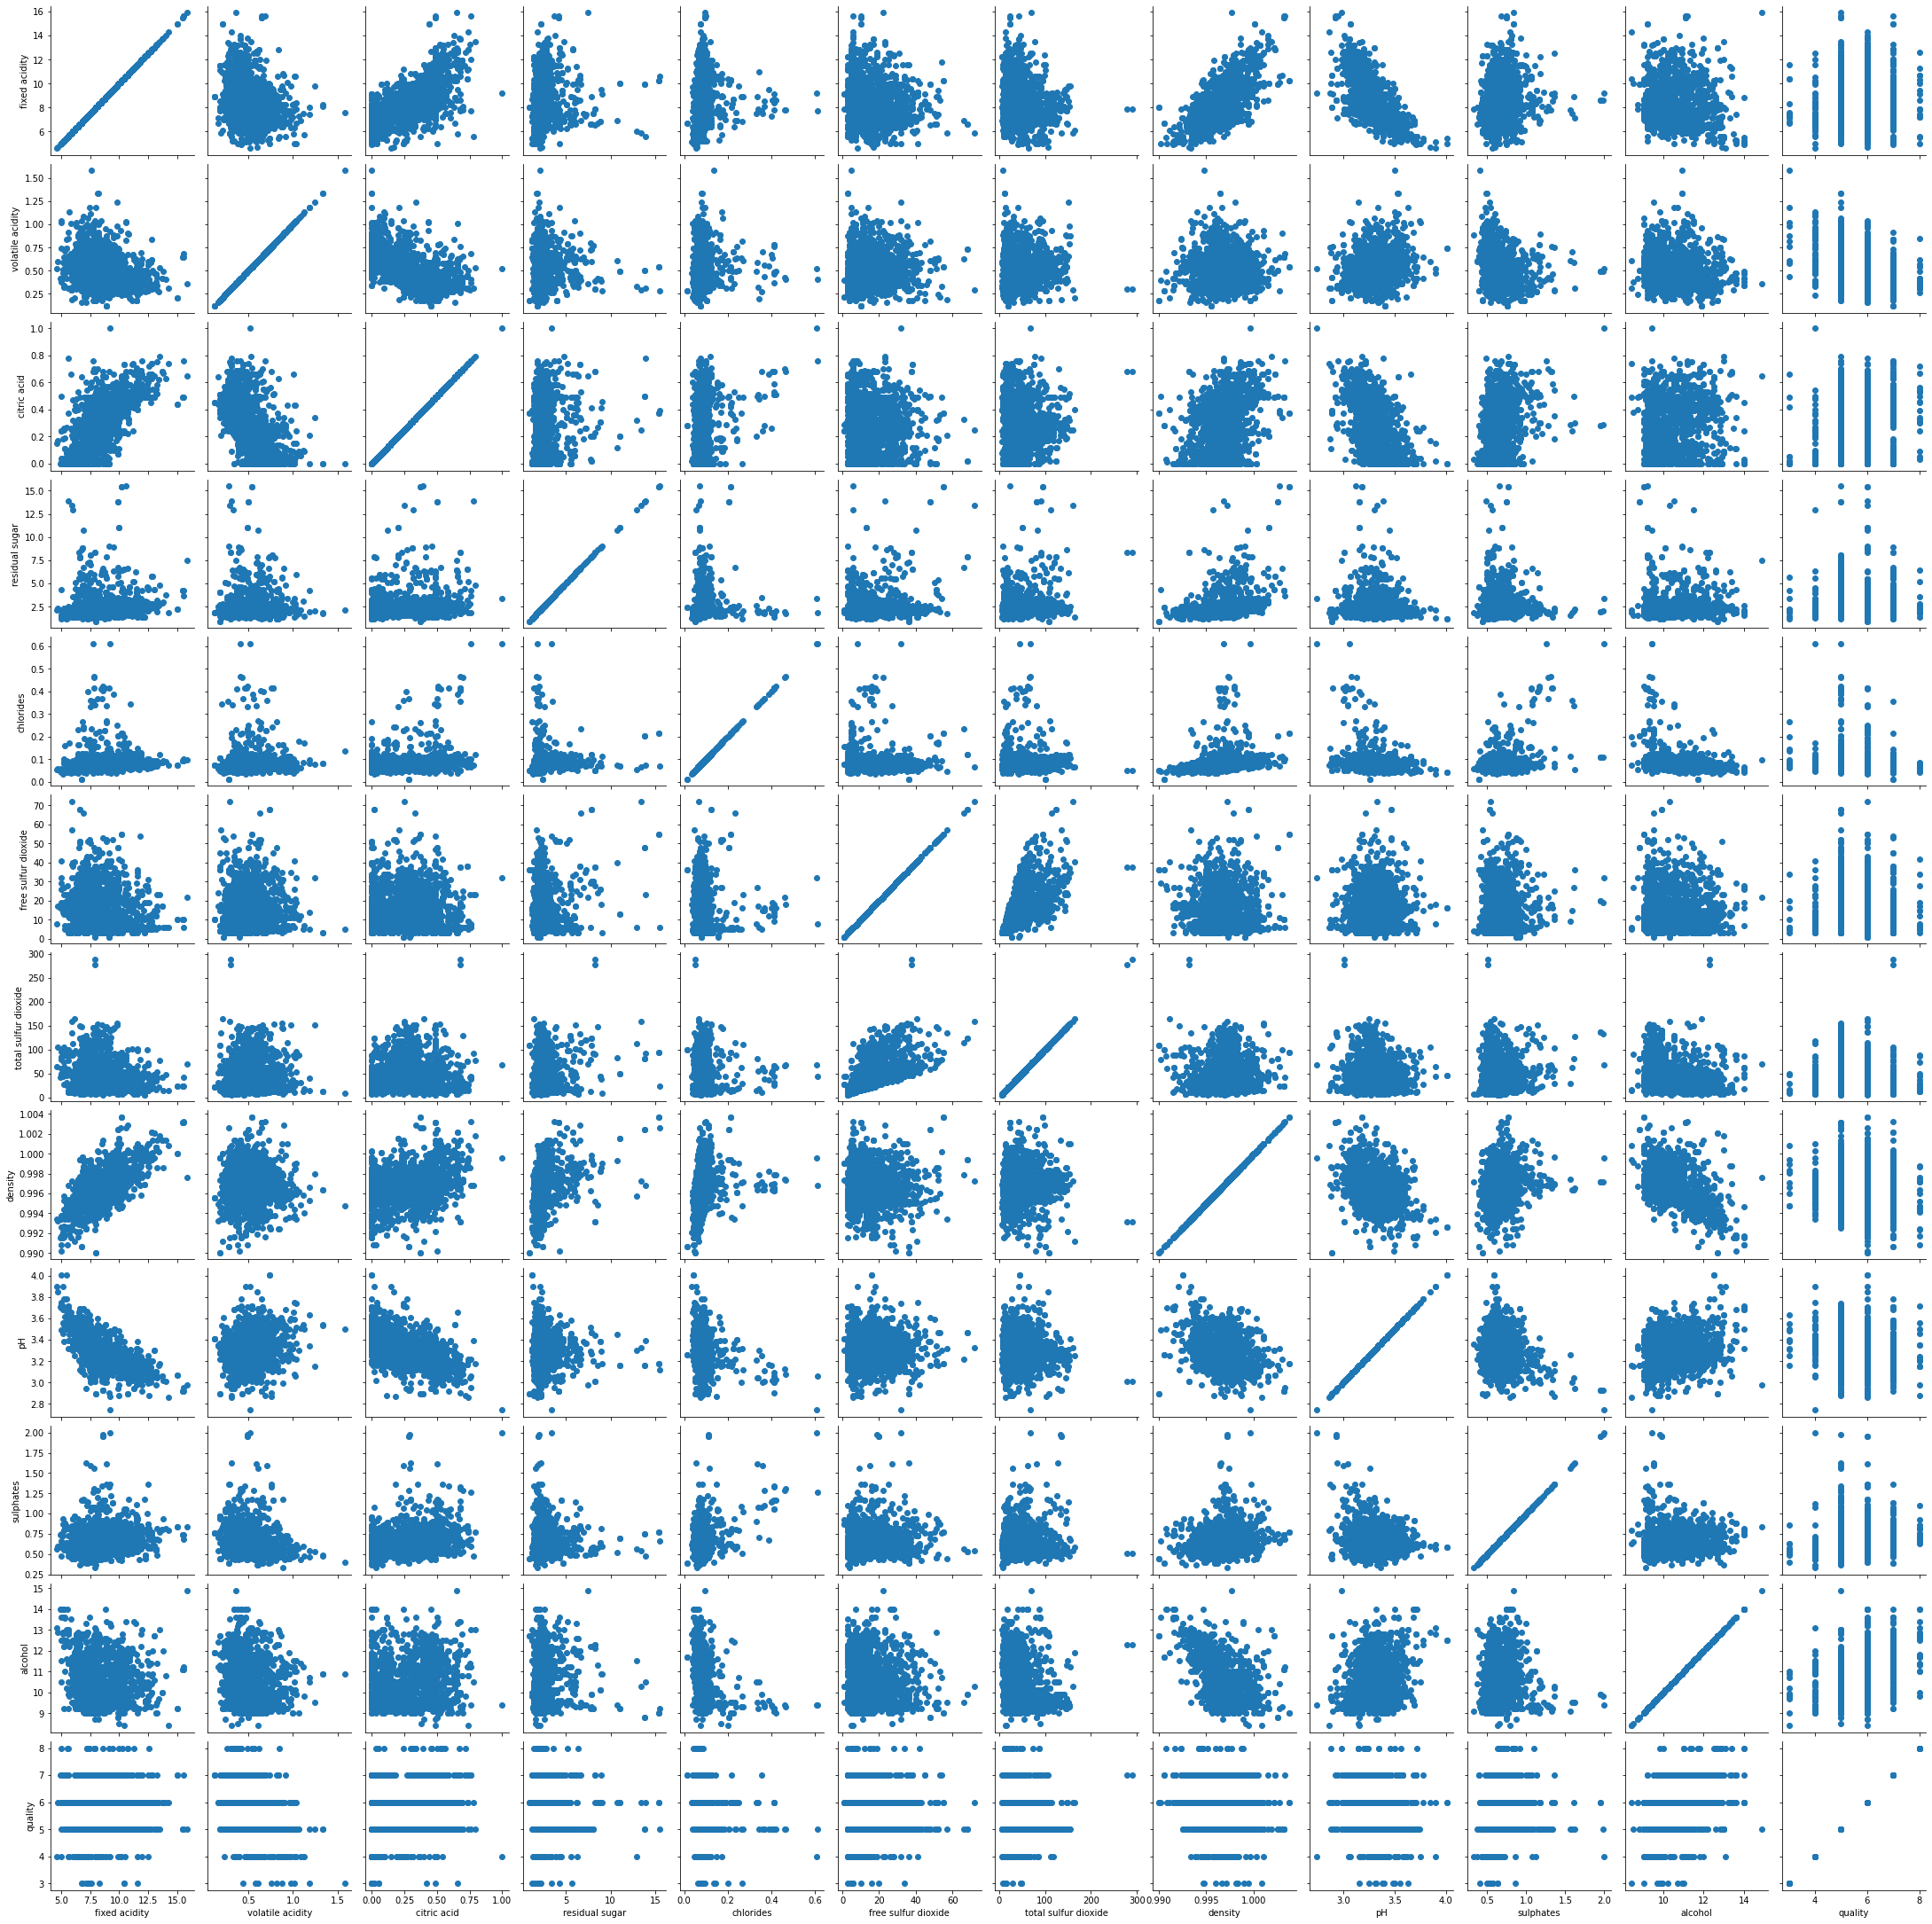

In [ ]:
g = sns.PairGrid(data_red_wine)
g.map(plt.scatter);

Sprawdzenie czy wszystkie zmienne są numeryczne.

In [ ]:
data_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


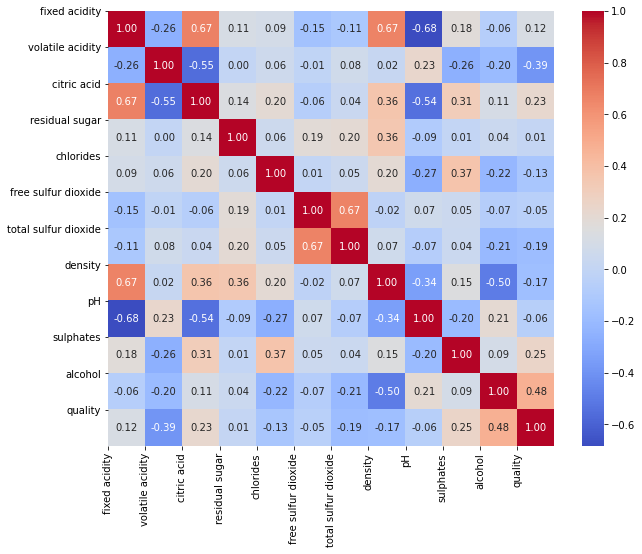

In [ ]:
#Obliczenie korelacji względem wszystkich zmiennych
corr = data_red_wine.corr()
#Rozmiar wykresu
fig, ax = plt.subplots(figsize=(10, 8))
#Generowanie heatmapy, zezwolenie na adnotacje i umieszczenie liczb
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Oś X
plt.xticks(range(len(corr.columns)), corr.columns);
#Oś Y
plt.yticks(range(len(corr.columns)), corr.columns)
#Pokazanie wykresu
plt.show()

Pobranie biblioteki do testowania rozkładów

In [ ]:
from scipy.stats import normaltest

Dla wszystkich zmiennych wartości p są mniejsze od 0.05 zatem wszystkie mają rozkład normalny.

In [ ]:
k, pr = normaltest(data_red_wine)
print(pr)

[1.75282777e-049 7.19258904e-032 9.66282226e-034 0.00000000e+000
 0.00000000e+000 4.77936533e-075 1.43389083e-106 2.14732027e-007
 4.84686453e-008 1.17590652e-197 3.31632885e-034 1.78450303e-004]


Boxploty wraz z wartościami odstającymi dla każdej ze zmiennych

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

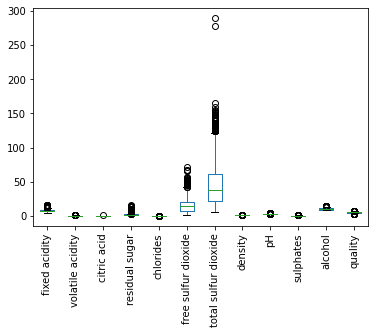

In [ ]:
import matplotlib.pyplot as plt
plot = data_red_wine.plot(kind='box')
plt.xticks(rotation=90)

Zamiana formatu z wide na long, aby móc przeprowadzić ANOVE.

In [ ]:
df_melt = pd.melt(data_red_wine.reset_index(),  id_vars=['quality'], value_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
df_melt.sample(5)

,quality,variable,value
8722,5,free sulfur dioxide,4.00
6253,6,residual sugar,1.80
2767,6,volatile acidity,0.34
988,5,fixed acidity,7.70
8016,5,free sulfur dioxide,23.00


Z wyników ANOVY wynika, że odrzucamy H0, istnieją różnice między poszczególnymi dla danych poziomów jakości wina. Również interakcja wykazuje istotne wyniki.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('value ~ C(quality) + C(variable) + C(quality):C(variable)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(quality),1.288519e+04,5.0,25.328632,1.524141e-25
C(variable),3.006917e+06,10.0,2955.374089,0.000000e+00
C(quality):C(variable),1.183337e+05,50.0,23.261049,2.481195e-203
Residual,1.782861e+06,17523.0,NaN,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

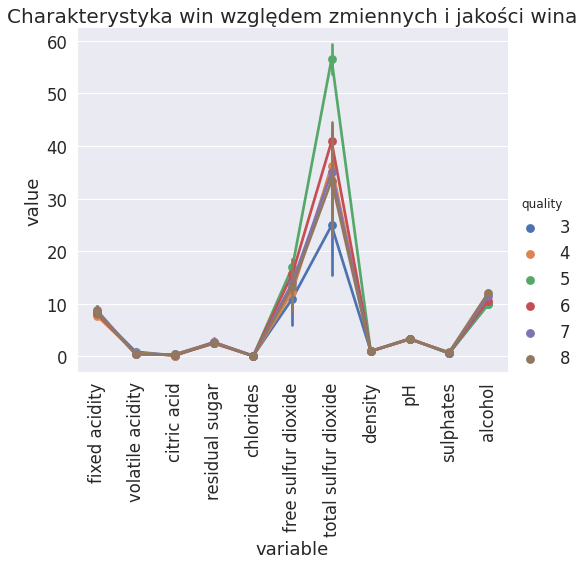

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=1.5)
sns.factorplot('variable','value',hue='quality',data=df_melt , height=6, aspect=1.2)
plt.title('Charakterystyka win względem zmiennych i jakości wina', fontsize=20)
plt.xticks(rotation=90)

Odrzucamy hipotezę H0a: Istnieją znaczące różnice pomiędzy jakością wina (F = 25.33, p=1.524141e-25, p <0,01)

Odrzucamy hipotezę H0b: Istnieją znaczące różnice pomiędzy zmiennymi (F = 25955.37, p=0.000, p <0,**05**)

Odrzucamy hipotezę H0b: Istnieją znaczące różnice pomiędzy zmiennymi (F = 23.261049, p=2.481195e-203, p <0.05) 

In [ ]:
quality_3 = df_melt[df_melt['quality']==3]
quality_4 = df_melt[df_melt['quality']==4]
quality_5 = df_melt[df_melt['quality']==5]
quality_6 = df_melt[df_melt['quality']==6]
quality_7 = df_melt[df_melt['quality']==7]
quality_8 = df_melt[df_melt['quality']==8]

In [ ]:
quality_3

,quality,variable,value
459,3,fixed acidity,11.60
517,3,fixed acidity,10.40
690,3,fixed acidity,7.40
832,3,fixed acidity,10.40
899,3,fixed acidity,8.30
...,...,...,...
17289,3,alcohol,10.90
17364,3,alcohol,9.80
17459,3,alcohol,9.70
17468,3,alcohol,10.20


Przeprowadzamy test Tuckeya, z którego wynika, że istotne różnice są dla całkowitego poziomu dwutlenka siarki

In [ ]:
import scipy.stats as stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

# Tworzę specjalną wartość
KOT = MultiComparison(quality_3['value'],quality_3['variable'])
AA = KOT.tukeyhsd()
print(AA.summary())

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1               group2        meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------
             alcohol            chlorides  -9.8325  0.014 -18.5453  -1.1197   True
             alcohol          citric acid   -9.784 0.0149 -18.4968  -1.0712   True
             alcohol              density  -8.9575 0.0385 -17.6703  -0.2448   True
             alcohol        fixed acidity   -1.595    0.9 -10.3078   7.1178  False
             alcohol  free sulfur dioxide    1.045    0.9  -7.6678   9.7578  False
             alcohol                   pH   -6.557 0.3291 -15.2698   2.1558  False
             alcohol       residual sugar    -7.32 0.1858 -16.0328   1.3928  False
             alcohol            sulphates   -9.385 0.0238 -18.0978  -0.6722   True
             alcohol total sulfur dioxide   14.945  0.001   6.2322  23.6578   True
    

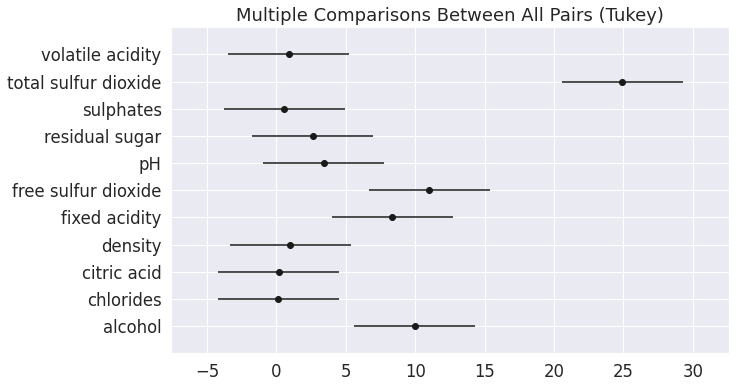

In [ ]:
AA.plot_simultaneous()    
plt.vlines(x=160,ymin=-0.5,ymax=3.5, color="red")

In [ ]:
import scipy.stats as stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

# Tworzę specjalną wartość
KOT = MultiComparison(quality_4['value'],quality_4['variable'])
AA = KOT.tukeyhsd()
print(AA.summary())

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1               group2        meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------
             alcohol            chlorides -10.1744  0.001 -15.6906  -4.6582   True
             alcohol          citric acid -10.0909  0.001 -15.6072  -4.5747   True
             alcohol              density  -9.2686  0.001 -14.7848  -3.7523   True
             alcohol        fixed acidity  -2.4858    0.9  -8.0021   3.0304  False
             alcohol  free sulfur dioxide   1.9991    0.9  -3.5172   7.5153  False
             alcohol                   pH  -6.8836  0.003 -12.3998  -1.3674   True
             alcohol       residual sugar  -7.5708  0.001  -13.087  -2.0545   True
             alcohol            sulphates  -9.6687  0.001 -15.1849  -4.1525   True
             alcohol total sulfur dioxide  25.9802  0.001   20.464  31.4964   True
    

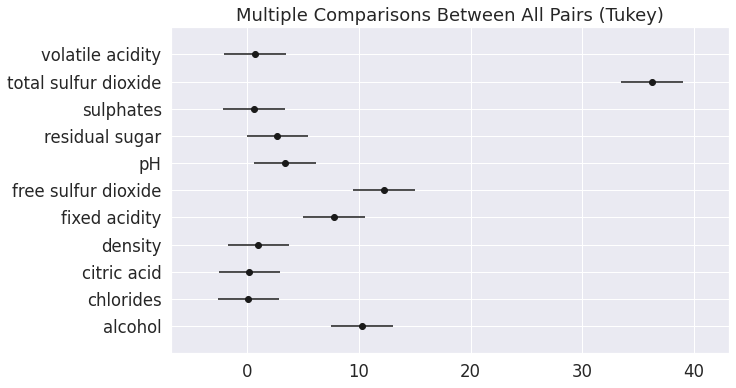

In [ ]:
AA.plot_simultaneous()    
plt.vlines(x=160,ymin=-0.5,ymax=3.5, color="red")

In [ ]:
# Tworzę specjalną wartość
KOT = MultiComparison(quality_5['value'],quality_5['variable'])
AA = KOT.tukeyhsd()
print(AA.summary())

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1               group2        meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------
             alcohol            chlorides   -9.807  0.001 -11.8401  -7.7739   True
             alcohol          citric acid   -9.656  0.001 -11.6891  -7.6229   True
             alcohol              density  -8.9026  0.001 -10.9357  -6.8695   True
             alcohol        fixed acidity  -1.7325 0.1805  -3.7656   0.3007  False
             alcohol  free sulfur dioxide   7.0841  0.001    5.051   9.1173   True
             alcohol                   pH  -6.5948  0.001  -8.6279  -4.5616   True
             alcohol       residual sugar  -7.3709  0.001   -9.404  -5.3377   True
             alcohol            sulphates  -9.2787  0.001 -11.3118  -7.2456   True
             alcohol total sulfur dioxide  46.6142  0.001  44.5811  48.6474   True
    

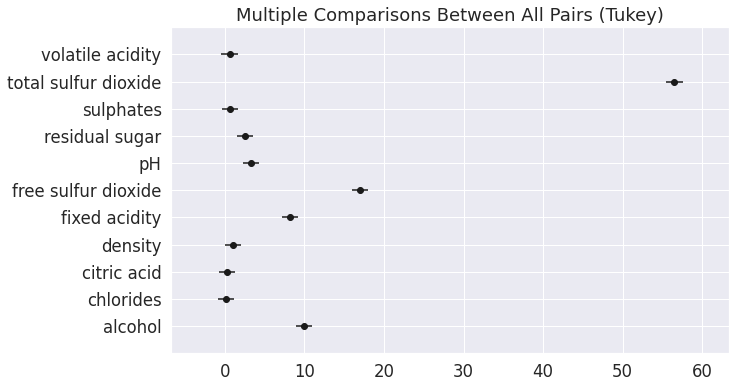

In [ ]:
AA.plot_simultaneous()    
plt.vlines(x=160,ymin=-0.5,ymax=3.5, color="red")

In [ ]:
# Tworzę specjalną wartość
KOT = MultiComparison(quality_6['value'],quality_6['variable'])
AA = KOT.tukeyhsd()
print(AA.summary())

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1               group2        meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------
             alcohol            chlorides -10.5446  0.001 -12.0154  -9.0737   True
             alcohol          citric acid -10.3557  0.001 -11.8265  -8.8848   True
             alcohol              density  -9.6329  0.001 -11.1038  -8.1621   True
             alcohol        fixed acidity  -2.2823  0.001  -3.7532  -0.8115   True
             alcohol  free sulfur dioxide   5.0821  0.001   3.6112   6.5529   True
             alcohol                   pH  -7.3114  0.001  -8.7823  -5.8406   True
             alcohol       residual sugar  -8.1523  0.001  -9.6232  -6.6815   True
             alcohol            sulphates  -9.9542  0.001  -11.425  -8.4833   True
             alcohol total sulfur dioxide  30.2404  0.001  28.7695  31.7112   True
    

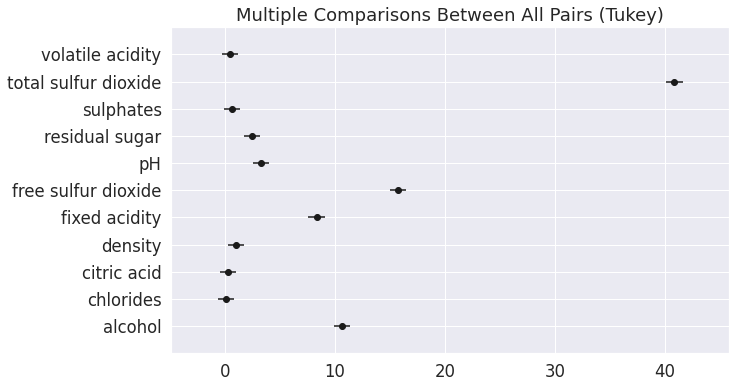

In [ ]:
AA.plot_simultaneous()    
plt.vlines(x=160,ymin=-0.5,ymax=3.5, color="red")

In [ ]:
# Tworzę specjalną wartość
KOT = MultiComparison(quality_7['value'],quality_7['variable'])
AA = KOT.tukeyhsd()
print(AA.summary())

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1               group2        meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------
             alcohol            chlorides -11.3893  0.001 -14.7801  -7.9985   True
             alcohol          citric acid -11.0907  0.001 -14.4815  -7.6999   True
             alcohol              density -10.4698  0.001 -13.8606   -7.079   True
             alcohol        fixed acidity  -2.5936 0.3262  -5.9844   0.7973  False
             alcohol  free sulfur dioxide   2.5793 0.3348  -0.8115   5.9701  False
             alcohol                   pH  -8.1752  0.001  -11.566  -4.7844   True
             alcohol       residual sugar  -8.7453  0.001 -12.1361  -5.3545   True
             alcohol            sulphates -10.7247  0.001 -14.1155  -7.3338   True
             alcohol total sulfur dioxide  23.5542  0.001  20.1634   26.945   True
    

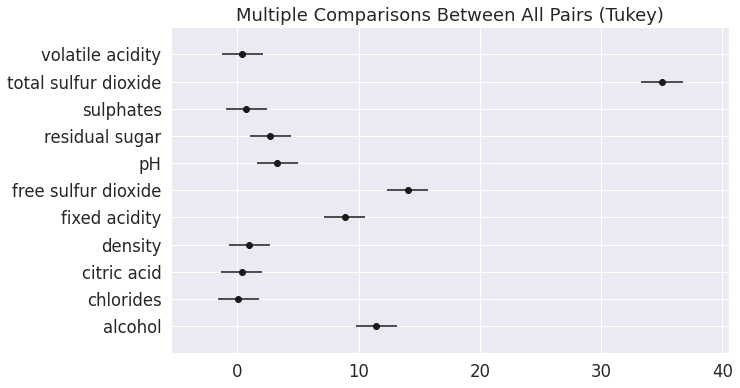

In [ ]:
AA.plot_simultaneous()    
plt.vlines(x=160,ymin=-0.5,ymax=3.5, color="red")

In [ ]:
# Tworzę specjalną wartość
KOT = MultiComparison(quality_8['value'],quality_8['variable'])
AA = KOT.tukeyhsd()
print(AA.summary())

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1               group2        meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------
             alcohol            chlorides  -12.026 0.0014 -21.1684  -2.8836   True
             alcohol          citric acid -11.7033 0.0022 -20.8457  -2.5609   True
             alcohol              density -11.0992  0.005 -20.2416  -1.9568   True
             alcohol        fixed acidity  -3.5278    0.9 -12.6702   5.6146  False
             alcohol  free sulfur dioxide   1.1833    0.9  -7.9591  10.3257  False
             alcohol                   pH  -8.8272 0.0691 -17.9696   0.3152  False
             alcohol       residual sugar  -9.5167 0.0336 -18.6591  -0.3743   True
             alcohol            sulphates -11.3267 0.0037 -20.4691  -2.1843   True
             alcohol total sulfur dioxide    21.35  0.001  12.2076  30.4924   True
    

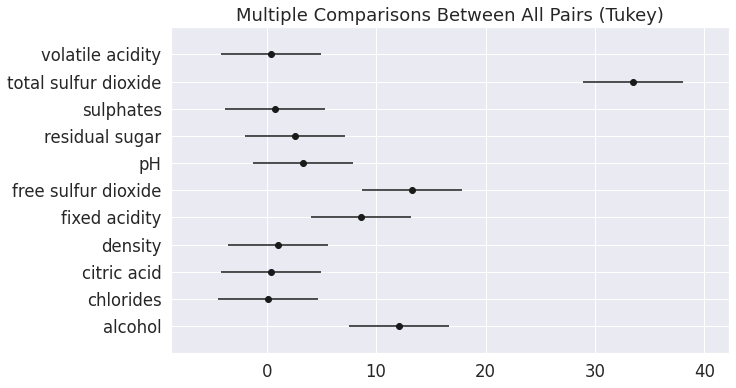

In [ ]:
AA.plot_simultaneous()    
plt.vlines(x=160,ymin=-0.5,ymax=3.5, color="red")

In [ ]:
corr_matrix = data_red_wine.corr()
corr_quality = corr_matrix['quality'].sort_values(ascending = False)
corr_quality

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [ ]:
corr_alcohol = corr_matrix['alcohol'].sort_values(ascending = False)
corr_alcohol

alcohol                 1.000000
quality                 0.476166
pH                      0.205633
citric acid             0.109903
sulphates               0.093595
residual sugar          0.042075
fixed acidity          -0.061668
free sulfur dioxide    -0.069408
volatile acidity       -0.202288
total sulfur dioxide   -0.205654
chlorides              -0.221141
density                -0.496180
Name: alcohol, dtype: float64

#Proba klasyfikacji wina przy użyciu prostych metod uczenia maszynowego.
Początkowo do przygotowania danych użyjemy funkcji z biblioteki sklearn, która standaryzuje nasze zmienne. Zestandaryzowany wynik jest obliczany jako **z = (x-u)/s**, gdzie u jest średnią a s odchyleniem standardowym. Dodatkowo na początku podzielimy dane na 2 grupy:
*quality <= 5 - wino słabej jakości (0)
*quality >5 - wino dobrej jakości (1)

Następnie przeprowadzimy PCA (Principal Components Analysis), czyli analizę głównych składowych, aby spośród zmiennych do dalszej analizy wybrać te najodpowiedniejsze.


In [ ]:
reviews = []
for i in data_red_wine['quality']:
    if i<=5:
      reviews.append('0')
    elif i > 5:
      reviews.append('1')
data_red_wine['Reviews'] = reviews

In [ ]:
x = data_red_wine.iloc[:,:11]
y = data_red_wine['Reviews']

In [ ]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Reviews, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

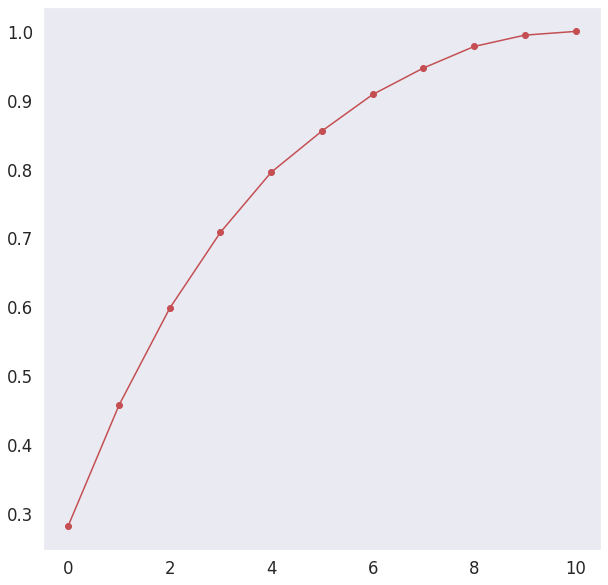

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

Jak widać na powyższym wykresie 6 zmiennych wyjaśnia ponad 90% zmienności w danych, do dalszej analizy powinniśmy wybrać więc 6 pierwszych zmiennych.

In [ ]:
pca_new = PCA(n_components=6)
x_new = pca_new.fit_transform(x)

W dalszej częście przy użyciu funkcji biblioteki sklearn, podzielimy dane na część treningową i testową

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3, random_state = 101)

Pierwszym modelem, którego użyjemy jest model regresji logistycznej. Model regresji logistycznej jest szczególnym przypadkiem uogulnionego modelu regresji liniowej. Znajduje zastosowanie, gdy zmienna jest zmienną dychotomiczną, to znaczy przyjmuję tylko dwie wartości np. 0 i 1 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [ ]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print('Macierz błędu \n')
print(lr_conf_matrix)
print('\n Dokładność dopasowania \n')
print(lr_acc_score*100)

Macierz błędu 

[[163  69]
 [ 55 193]]

 Dokładność dopasowania 

74.16666666666667


Jak widać model regresji liniowej dopasowany jest w ok 74%.

W dalszej części do predykcji jakości wina posłużymy się drzewem decyzyjnym. Drzewo decyzyjne jesto to etykietowane drzewo, w którym każdy węzeł wewnętrzny odpowiada przeprowadzeniu pewnego wartość atrybutów, w naszym przypadku jakości wina. Z węzła wewnętrznego wychodzi tyle gałęzi, ile jest możliwych wyników testu odpowiadającego temu węzłowi, każdy liść zawiera decyzję o klasyfikacji przykładu.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [ ]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print('Macierz błędu \n')
print(dt_conf_matrix)
print('\n Dokładność dopasowania \n')
print(dt_acc_score*100)

Macierz błędu 

[[154  78]
 [ 56 192]]

 Dokładność dopasowania 

72.08333333333333


Drzewo decyzyjne dało nam gorszą predykcję niż regresja logistyczna.

Ostatnim algorytmem, który sprawdzimy jest las losowy. Losowy model lasu to zbiór modeli drzewa decyzyjnego, które są łączone w celu tworzenia prognoz. Kiedy tworzymy las losowy, trzeba określić liczbę drzew decyzyjnych, których chcemy użyć do utworzenia modelu. Algorytm lasu losowego pobiera losowo próbki obserwacji z danych treningowych i buduje model drzewa decyzyjnego dla każdej próbki. Losowe próbki są zwykle pobierane z zamianą, co oznacza, że tę samą obserwację można pobrać wiele razy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 200)
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print('Macierz błędu \n')
print(rf_conf_matrix)
print('\n Dokładność dopasowania \n')
print(rf_acc_score*100)

Macierz błędu 

[[163  69]
 [ 46 202]]

 Dokładność dopasowania 

76.04166666666666


Las losowy dał nam najlepsze wyniki spośród zastosowanych metod. 